# Examine the ratings count and corelation between columns in merged dataset 

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import dask.dataframe as dd
from collections import defaultdict

In [2]:
#Read Review2021.csv
parent_dir = 'D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/Kaggle Dataset/'

path_dic = {
            'B': parent_dir+'business_s.csv',
            'R':parent_dir+'Review2021.csv',
            'U':parent_dir+'U.csv'
           }

review_data = pd.read_csv(path_dic['R'])

In [3]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134545 entries, 0 to 134544
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      134545 non-null  int64  
 1   Unnamed: 0.1    134545 non-null  int64  
 2   Unnamed: 0.1.1  134545 non-null  int64  
 3   review_id       134545 non-null  object 
 4   user_id         134545 non-null  object 
 5   business_id     134545 non-null  object 
 6   stars           134545 non-null  float64
 7   useful          134545 non-null  int64  
 8   funny           134545 non-null  int64  
 9   cool            134545 non-null  int64  
 10  text            134545 non-null  object 
 11  date            134545 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 12.3+ MB


In [4]:
#Read business.csv
business_data = pd.read_csv(path_dic['B'])


In [5]:
#merge business.csv and rating.csv
mergedDataRB = review_data.merge(business_data, on = 'business_id', how = 'inner')

In [6]:
#frequency count of stars
print(len(mergedDataRB))
mergedDataRB['stars_x'].value_counts().sort_index()

134530


1.0    25866
2.0     7922
3.0     8707
4.0    17223
5.0    74812
Name: stars_x, dtype: int64

No handles with labels found to put in legend.


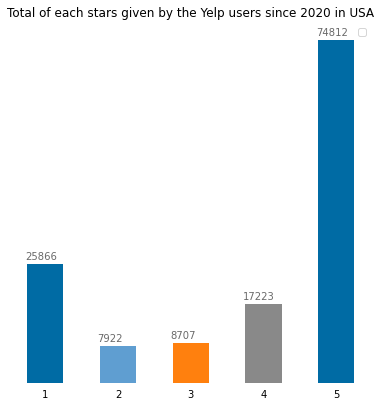

In [7]:
#Bar chart of stars count
%matplotlib inline

stars = ['1', '2', '3', '4', '5']
bar = np.arange(len(stars))
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(bar, mergedDataRB['stars_x'].value_counts().sort_index(), color = [(0/255, 107/255, 164/255),(95/255, 158/255, 209/255), (255/255, 128/255, 14/255), (137/255, 137/255, 137/255), (0/255, 107/255, 164/255)], width = 0.50)
ax.get_yaxis().set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+1000, \
            str(int(i.get_height())), fontsize=10,
                color='dimgrey')
ax.set_title('Total of each stars given by the Yelp users since 2020 in USA')
#ax.label.set_visible(False)
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
plt.xticks(bar,stars)
plt.legend()
plt.show()

In [8]:
#Column names
mergedDataRB.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'review_id',
       'user_id', 'business_id', 'stars_x', 'useful', 'funny', 'cool', 'text',
       'date', 'Unnamed: 0_y', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [9]:
#Delete unnecessary columns
mergedDataRB = mergedDataRB.dropna(subset = ['is_open'])
del mergedDataRB['Unnamed: 0_x']
del mergedDataRB['Unnamed: 0_y']
del mergedDataRB['Unnamed: 0.1']
del mergedDataRB['Unnamed: 0.1.1']

In [10]:
mergedDataRB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134530 entries, 0 to 134529
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   review_id     134530 non-null  object 
 1   user_id       134530 non-null  object 
 2   business_id   134530 non-null  object 
 3   stars_x       134530 non-null  float64
 4   useful        134530 non-null  int64  
 5   funny         134530 non-null  int64  
 6   cool          134530 non-null  int64  
 7   text          134530 non-null  object 
 8   date          134530 non-null  object 
 9   name          134530 non-null  object 
 10  address       131216 non-null  object 
 11  city          134530 non-null  object 
 12  state         134530 non-null  object 
 13  postal_code   134492 non-null  object 
 14  latitude      134530 non-null  float64
 15  longitude     134530 non-null  float64
 16  stars_y       134530 non-null  float64
 17  review_count  134530 non-null  int64  
 18  is_o

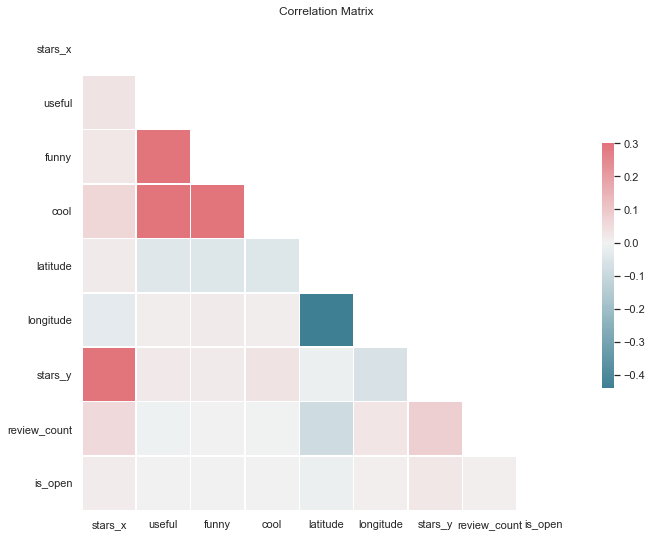

In [11]:
# Plot the correlation matrix
def corr_plot(df, title = 'Correlation Matrix', annot=False, show = True):
    sns.set(style = 'white')

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=annot,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(title)
    if show:
        plt.show()
corr_plot(mergedDataRB)

# NLTK

In [12]:
#Store reviews and star seperatly in documents variable
documents = [(t, star) for t,star in zip(mergedDataRB['text'], mergedDataRB['stars_x'])]

In [13]:
#Create a dataframe from documents variable
documentsDataFrame = mergedDataRB[['text','stars_x']]
documentsDataFrame.iloc[1]

text       The hamburger and fries were surprisingly deli...
stars_x                                                    4
Name: 1, dtype: object

In [14]:
#Save documentsDataFrame in a csv file
documentsDataFrame.to_csv('D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/Kaggle Dataset/' + 'documents' + '.csv')
len(documents)

134530

In [15]:
#Load documents.csv
documentsDataFrame = pd.read_csv('D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/Kaggle Dataset/' + 'documents' + '.csv')
documents = [(t, star) for t,star in zip(documentsDataFrame['text'], documentsDataFrame['stars_x'])]

In [16]:
documents[0]

("They can't manage to get online orders right and no one there answers the phone to be able to correct them. They don't even have a voicemail to leave a message.",
 1.0)

In [17]:
#Sample stemming code from NLTK
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]

for w in example_words:
    print(ps.stem(w))

python
python
python
python
pythonli


In [18]:
#Code to fing 15 most common terms
import nltk

all_words = []

for (t, star) in documents:
    for word in t.split():
        w = word.lower().replace('.', '').replace(',', '').replace('!', '')
        all_words.append(ps.stem(w))
        
all_words = nltk.FreqDist(all_words)
print(all_words.most_common(15))
print("stupid appeared: " + str(all_words['stupid']) + "times")

[('the', 611940), ('and', 476996), ('i', 344674), ('to', 328368), ('a', 299903), ('wa', 234370), ('of', 169808), ('for', 152467), ('it', 151977), ('is', 145721), ('in', 141882), ('my', 133234), ('they', 117527), ('thi', 110457), ('with', 107695)]
stupid appeared: 319times


In [19]:
len(all_words)
type(all_words)

nltk.probability.FreqDist

In [20]:
#Store the words of each review if they occur in all_words variable
words_features = [s for (s,_) in list(all_words.most_common(3000))]

def find_features(document):
    words = set(document.split())
    features = {}
    for w in words:
        w = w.lower().replace('.', '').replace(',', '').replace('!', '')
        w = ps.stem(w)
        features[w] = (w in words_features)
    return features

featuresets = [(find_features(doc), star) for (doc,star) in documents]
print(featuresets[0])

({'right': True, "don't": True, 'be': True, 'a': True, 'answer': True, 'one': True, 'abl': True, 'them': True, 'to': True, 'there': True, 'no': True, 'get': True, 'order': True, 'leav': True, 'voicemail': True, 'they': True, 'have': True, 'messag': True, 'phone': True, 'the': True, 'onlin': True, 'and': True, "can't": True, 'even': True, 'correct': True, 'manag': True}, 1.0)


In [21]:
#Store featureset in csv file

features = []
star = []

for x in featuresets:
    features.append(x[0])
    star.append(x[1]) 
      
dict = {'Features': features, 'Star': star}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/Kaggle Dataset/featureset.csv') 

In [25]:
# POS to NEG encode

temp = []
pos_count = 0
for i in range(len(featuresets)):
    if featuresets[i][1] >= 4:
        temp.append((featuresets[i][0], 'pos'))
        pos_count = pos_count + 1
    else:
        temp.append((featuresets[i][0], 'neg'))
print("pos rate: ", pos_count / len(temp))
print("len of temp: ", len(temp))

pos rate:  0.6841225005574965
len of temp:  134530


In [26]:
training_set = temp[:107624] # 80% data for training
testing_set = temp[107624:] # 20% data for testing

In [29]:
# only 1 and 5
temp = []
one_count = 0
for i in range(len(featuresets)):
    if featuresets[i][1] == 1:
        temp.append((featuresets[i][0], 1.0))
        one_count = one_count + 1
    elif featuresets[i][1] == 5:
        temp.append((featuresets[i][0], 5.0))
print("one rate: ", one_count / len(temp))
print("len of temp: ", len(temp))

one rate:  0.25691809531377263
len of temp:  100678


In [30]:
train_set = temp[:80542] # 80% data for training
test_set = temp[80542:] # 20% data for testing

In [31]:
#Try Naive Bayes classifier with train_set and test_set
clf = nltk.NaiveBayesClassifier.train(train_set)
print("Naive Bayes Classifier accuracy: ", nltk.classify.accuracy(clf, test_set) * 100)
clf.show_most_informative_features(50)

Naive Bayes Classifier accuracy:  69.50735001986492
Most Informative Features
                  racist = True              1.0 : 5.0    =    295.9 : 1.0
                incompet = True              1.0 : 5.0    =    274.7 : 1.0
                 disgust = True              1.0 : 5.0    =    216.0 : 1.0
                  rudest = False             1.0 : 5.0    =    195.7 : 1.0
            unprofession = True              1.0 : 5.0    =    171.7 : 1.0
                unaccept = True              1.0 : 5.0    =    160.8 : 1.0
                  violat = False             1.0 : 5.0    =    159.0 : 1.0
                   audac = False             1.0 : 5.0    =    139.8 : 1.0
                 fraudul = False             1.0 : 5.0    =    130.1 : 1.0
                    scam = True              1.0 : 5.0    =    117.6 : 1.0
                     bbb = False             1.0 : 5.0    =     99.6 : 1.0
               blatantli = False             1.0 : 5.0    =     97.4 : 1.0
                 disgr

# Try different Machine Learning models on training_set and testing_set

In [32]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

In [33]:
Naive_Bayes_clf = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(Naive_Bayes_clf, testing_set))*100)
Naive_Bayes_clf.show_most_informative_features(15)

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

Original Naive Bayes Algo accuracy percent: 60.822864788523
Most Informative Features
                     smh = False             neg : pos    =    191.7 : 1.0
                incompet = True              neg : pos    =    158.4 : 1.0
                  rudest = False             neg : pos    =    157.0 : 1.0
            unprofession = True              neg : pos    =    122.9 : 1.0
                 fraudul = False             neg : pos    =    103.5 : 1.0
                  racist = True              neg : pos    =    100.1 : 1.0
                  violat = False             neg : pos    =     81.2 : 1.0
                careless = False             neg : pos    =     79.4 : 1.0
                   audac = False             neg : pos    =     77.7 : 1.0
                 disgust = True              neg : pos    =     75.2 : 1.0
                   unwil = False             neg : pos    =     70.2 : 1.0
                    scam = True              neg : pos    =     69.2 : 1.0
              

C:\Users\akhau\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC_classifier accuracy percent: 93.28402586783618


C:\Users\akhau\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_classifier accuracy percent: 93.38809187541813
SGDClassifier_classifier accuracy percent: 93.40295844792983


In [34]:
from nltk.classify import ClassifierI
from statistics import mode

class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        chosen_class = votes.count(mode(votes))
        return chosen_class / len(votes)
    
voted_classifier = VoteClassifier(
                                  LinearSVC_classifier,
                                  SGDClassifier_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)
print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)


voted_classifier accuracy percent: 93.3843752322902


# Textblob

In [35]:
#Find polarity, subjectivity and word list using Textblob
from textblob import TextBlob

group = pd.DataFrame(documents)
group.rename(columns = {0:'review_text', 1:'star'}, inplace = True)
group['polarity'] = [TextBlob(s).sentiment.polarity for s in group['review_text']]
group['subjectivity'] = [TextBlob(s).sentiment.subjectivity for s in group['review_text']]
group['word_list'] = [TextBlob(s).words.lemmatize() for s in group['review_text']]
print(list(group))
group.head()

['review_text', 'star', 'polarity', 'subjectivity', 'word_list']


,review_text,star,polarity,subjectivity,word_list
0,They can't manage to get online orders right a...,1.0,0.392857,0.580357,"[They, ca, n't, manage, to, get, online, order..."
1,The hamburger and fries were surprisingly deli...,4.0,0.450000,0.462500,"[The, hamburger, and, fry, were, surprisingly,..."
2,Sorry but it was not good we order chicken Mar...,2.0,-0.138333,0.580000,"[Sorry, but, it, wa, not, good, we, order, chi..."
3,"""Authenticity at it's finest!"" We started wi...",5.0,0.192012,0.622500,"[Authenticity, at, it, 's, finest, We, started..."
4,Always been my go to spot for real pizza over ...,4.0,0.400000,0.200000,"[Always, been, my, go, to, spot, for, real, pi..."


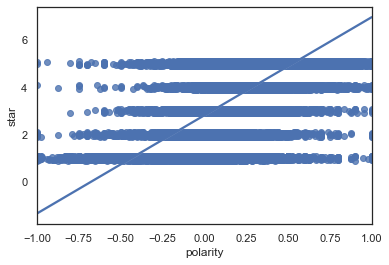

In [36]:
sns.regplot(x="polarity", y="star", data=group, y_jitter=.1)
plt.show()

In [37]:
print(group.columns)
print(len(group["review_text"]))

Index(['review_text', 'star', 'polarity', 'subjectivity', 'word_list'], dtype='object')
134530


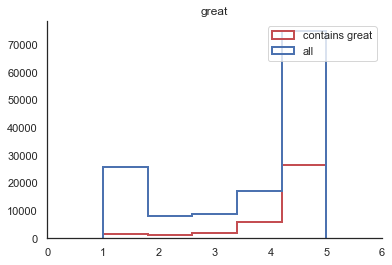

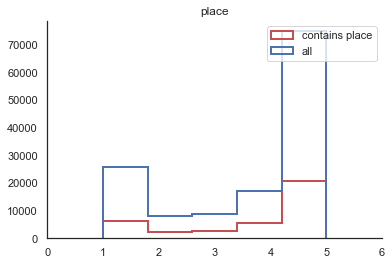

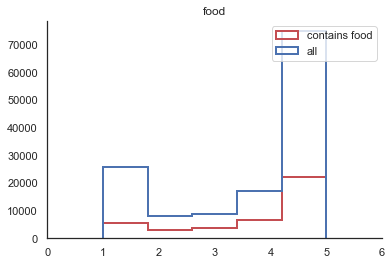

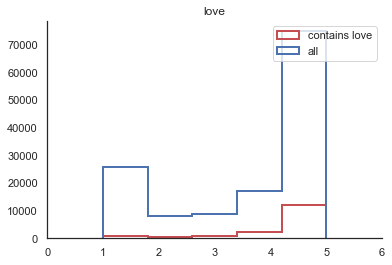

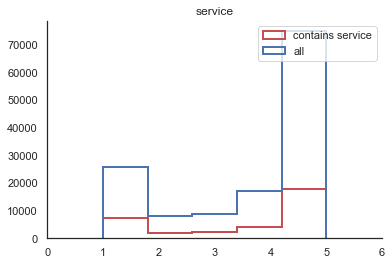

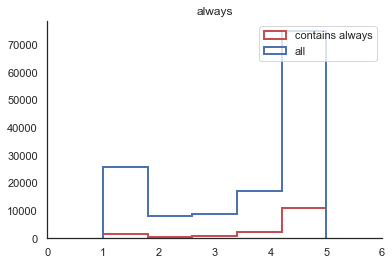

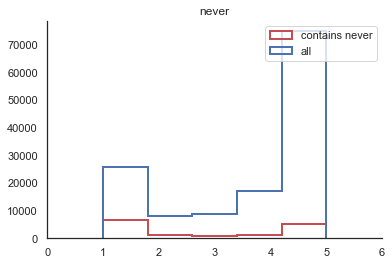

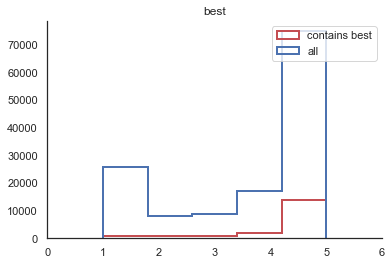

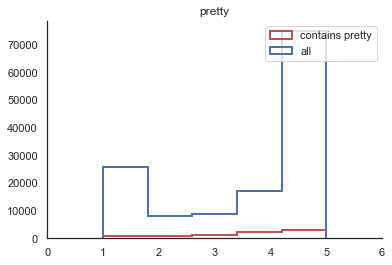

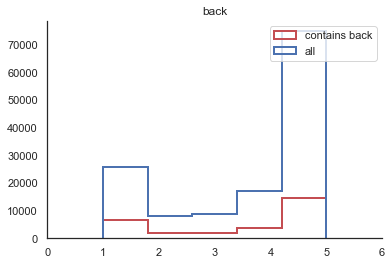

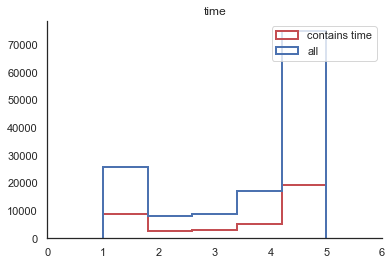

In [38]:
#Check the count of words in interesing_list for each review corresponding to their ratings.
interesing_list = ['great', 'place', 'food', 'love', 'service', 'always', 'never', 'best', 'pretty', 'back', 'time']
#interesing_list = ['rudest ', 'racist', 'incompetent', 'rude', 'beware','awesome', 'unprofession']
sns.set(style = 'white')
%matplotlib inline
for i in interesing_list:
    temp = group
    temp['indicate'] = [w.count(i) > 0 for w in group['word_list']]
    included = temp[temp['indicate'] == True]
    plt.figure()
    plt.hist(included['star'], color = 'r',  histtype='step', bins = 5, label = 'contains '+i, lw = 2)
    plt.hist(group['star'], color = 'b', histtype='step', bins = 5, label = 'all', lw = 2)
    plt.legend()
    plt.title(i)
    plt.xlim(0,6)
    sns.despine()
    plt.show()

# Usefulness, Cool & Funny

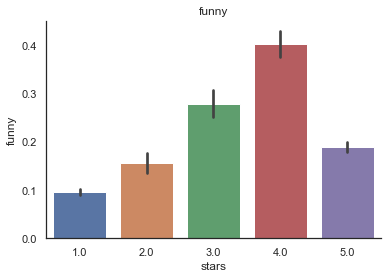

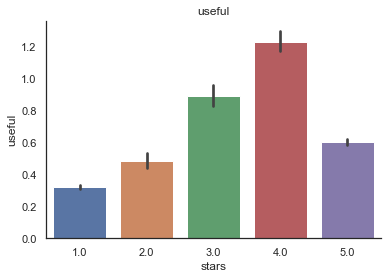

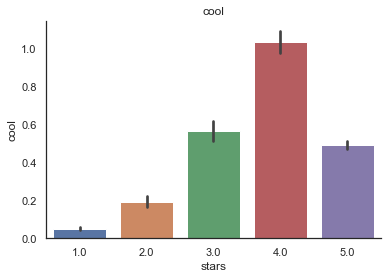

In [39]:
for col in ['funny', 'useful', 'cool']:
    sns.barplot(data = review_data, y = col, x = 'stars')
    sns.despine()
    plt.title(col)
    plt.show()

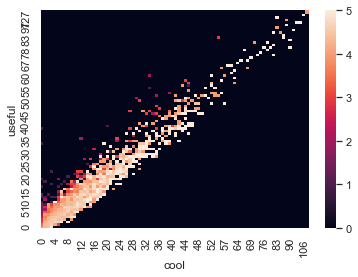

In [40]:
heat = review_data.pivot_table("stars", "useful", "cool").fillna(0)
ax = sns.heatmap(heat)
ax.invert_yaxis()
plt.show()

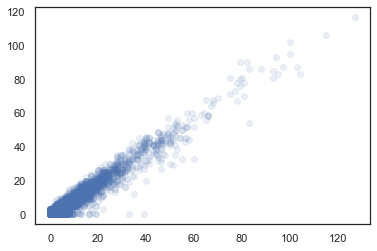

In [41]:
plt.scatter(review_data['useful'], review_data['cool'], alpha = 0.1)


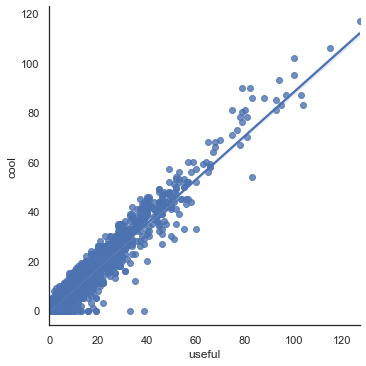

In [42]:
sns.lmplot(x="useful", y="cool", data=review_data)